# Credit Card Fraud Detection

## Table of Contents
1. [Introduction](##Introduction)
2. [Basics](##Basics)
3. [Objectives](##Objectives)
4. [Data Exploration](##Data_Exploration)
5. [Pre-Processing](##Pre-Processing)
6. [Training of Models](##Training_of_Models)
7. [Evaluation of Models](##Evaluation_of_Models)
8. [Evaluation and Future Works](##Evaluation_and_future_works)

## 1. Introduction
In this document we will use data to **identify trends** and attempt to **predict fraudulent credit card transactions**. For credit companies, it is important to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. If we are able to make such predictions which are reliable, we are able to help credit card companies **manage risks** effectively and based on facts, and perform **data-driven decisions**.

The dataset provided, contains transactions made by credit cards in September 2013 by European cardholders in two days. Due to confidentiality issues, the original features and more background information about the data cannot be provided. To get more accurate predictions and machine learning models, credit card companies should consider using data from the last few years. It is also worth noting, that the more data we have, the better the predictions become. However, this should not come at a cost of using poor quality data. Data with poor quality would for example be having duplicates, wrong entries for transactions (e.g., negative amounts, 30.Feb.2013), or just missing data.
If you want to try creating the models on your own data, it is possible to just change the data importet at the beginning. It is advisable, to make sure, that the data is in the same format as the example as otherwise there might be some compatibility issues, especially when we compare the impacts of each feature.

The dataset is highly **imbalanced**, which means that the amount of valid transactions heavily outweigh the fraudulent transactions. From the perspective of credit card companies, this would be considered a positive fact, but for data analysis this is problematic. In the chapter Preprocessing, this will be explained in detail. For now it is important to remember that imbalanced data does not provide usable predictions and adjustments are needed.

## 2. Basics

Before we delve into the process, I am going to cover some basics in data analytics and machine learning for those who are not familiar with these subjects. If you feel confident in the subject matter, you might first skip this part and when needed you can always check back.

### 2.1 What is Data Analytics?

Data analytics is the collection, transformation, and organization of data in order to draw conclusions, make predictions, and drive informed decision-making.

### 2.2 What is Machine Learning?

Machine learning (ML) is a part of Artificial intelligence and the study of computer algorithms that can improve automatically through experience and by the use of data. This is the more abstract definition of ML. In easier terms, ML is a tool for turning information into knowledge. This is achieved by having machines go through a learning process, trying different rules and learning from how well they perform.

Traditionally, we would use rules with data to create an answer to a question by ourselves, ML on the other hand uses data to discover rules behind a problem. To discover these rules it has to go through a learning process, where it iteratively gathers information. That is why it is called Machine **Learning**.

Before we move on to the specifics here are some important terms used in the following explanations:

1. **Dataset**: A set of data examples, which contain features which are important for extracting data. In our case the set of documented transactions form the dataset.
2. **Features**: Important information used to help us understand a problem. These are fed in to a ML algorithm to help it learn. In this case the transaction amount or the transaction date are features of the credit card transactions dataset.
3. **Model**: The representation of an occurence that a ML algorithm has learnt from the data it is fed during training. The model is the output you get after training an algorithm. For example, a decision tree algorithm would be trained and produce a decision tree model. In the following I will be using various Algorithms to 

### 2.3 Process of Data Analytics and Machine Learning

In general, there is a fixed pipeline for applying ML in data analytics. The steps in the pipeline are as follows:

![Data analytics and Machine Learning process](https://dida.do/img/containers/assets/blog/20211006_dv_data-centric-ai/model_centric_ml.png/738c1e4922336b4dd52fe00a01dc4322.png)

1. **Data Collection**: Collection of the data that the algorithm will use to learn. When collecting the data, quality and the method of storage of the data should be taken into consideration. Factors such as security, capacity, cost and more are important to keep in mind when making this decision.

2. **Data Pre-Processing**: In order to produce the best prediction models, the data needs to be engineered to the optimal format. This includes cleaning the data (e.g., removing duplicates), balancing data and other processes.

3. **Training**: Feeding the data that has been collected and prepared to the ML Algorithm to create a model.

4. **Evaluation**: Testing the model on various evaluation metrics to determine the quality of its performance.

5. **Tuning**: Iteratively tuning some parameters of the models to get the best performance out of them.

As parameters are tuned, the model is iteratively improved until it has a level of reliability that meets previously established expectations. After that the model is deployed into real life situations with real life, real-time data. Unfortunately, in ML an algorithm that works well for all tasks does not exist. Some perform well in some instances, whilst they might perform poorly in others. Hence, knowing different algorithms and the environments in which they perform best should help in finding the most suitable algorithm for the task. In many cases a combination of algorithms is utilized because they often provide better performances.
Generally we can classify the algorithms into two groups: supervised learning and unsupervised learning.

### 2.4 Supervised Learning

In supervised learning, the target feature is explained using descriptive features. Descriptive features are the inputs that the ML model receives, and the target feature is the output that it produces. In our dataset, the columns such as transaction time, date, and amount are descriptive features, and the model tries to predict whether the transaction is valid or fraudulent based on these features.

There are a variety of algorithms that are supervised learning techniques. However, in this paper we will not go into the details of the algorithms, but only name them and consider them as black boxes that create models based on training data.

### 2.5 Unsupervised Learning

In unsupervised learning, no target feature is specified. Rather, the goal is to capture the topology of the input dataset in order to detect patterns in the data. 
In this paper, we will not use unsupervised learning algorithms, as using algorithms on already labeled data is more appropriate for the task at hand.

## 3. Objectives

Whenever data analytics is applied in businesses, it is imperative to be aware of the objectives set by the stakeholders and know their strategic goals. Being aware of these goals helps preparing the data and eventually applying ML algorithms.

In this case, the strategic goal is to use historic data to create models that automatically detect and predict fraudulent credit card transactions to reduce manual labor costs, and increase customer satisfaction.

## 4. Data Exploration

The data collection step is irrelevant in this paper, since the data set is already provided. Before starting the preprocessing of the dataset, it is recommended to examine the dataset first, as this helps to get a general overview and to identify possible problems with the dataset.

Data exploration refers to the first step in which visualizations and statistical techniques are used to provide a better understanding of the data so that stakeholders not well versed with the technical aspects, can understand the current state of the data and understand the benefits of data analysis in terms of their strategic goals.

### 4.1 Library import

Before we can use the open source Python programming language for data analytics and ML, some libraries need to be imported. Libraries are collections of prewritten code that users can use to optimize tasks. This means that not everything has to be created from scratch, but that already existing functions can be reused.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import metrics

It is not necessary to know the details of these libraries to apply the ML algorithms, but for those interested, a brief description of their functions.

* **Numpy**: Provides mathematical functions to operate on large arrays.
* **Pandas**: Contains functions used for data manipulation and analysis.
* **Seaborn**: Data visualization library based on matplotlib. Used to draw attractive and informative statistical graphics.
* **Matplotlib**: Another library for creating static, animated, and interactive visualizations.
* **Time**: Has time-related functions.
* **Sklearn**: Sklearn, short for Scikit-learn, is a machine learning library for Python.

### 4.2 Dataset import

The dataset must be imported by entering the path of the document. To use your own dataset, you can replace the path with the location of your own file.

### 4.3 Overview of the dataset

Now that the imports are complete, we can use functions specifically from the Panda library to explore the data.

**Head**: The head function gets the first 5 rows of the dataset. It is useful for quickly testing if the dataset has the right type of data in it. We can also note that there are 31 columns that are called features in data analytics. Apart from the features Time, Amount, and Class, the others are labeled with V plus a number between one and 27. These descriptions are hidden due to confidentiality reasons. The **class** feature describes whether the transaction is valid or fraudulent. If the class value is zero, the transaction is considered valid, a one means the opposite.

In [39]:
df = pd.read_csv('Documents/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Describe**: This function is used to view basic statistical details like mean, percentiles, max etc. of the dataframe. We can see for example, that there are 284,807 transactions in the dataframe and the mean transaction amount is 88.35. Here we can already survey for potential errors in the data. If for example the min of time would be negative, we would have wrong entries for the time column.
In general there are the following types of attributes which make the data dirty:

| Type        | Description | Causes     | Harms     |
| :----------- | :----------- | :---------- | :--------- |
|Duplicate Data |Same data entry which appears more than once in the dataframe |Manual data entry, data import in batches or data migration | Skewed evaluation or analysis, inaccurate counts or predictions, confusion during data retrieval |
|Outdated Data   | Old data that should be replaced with more current and accurate information | Software systems becoming obsolete, accountable Staff changing | Inaccurate insights, decision making, and analytics |
| Incomplete data | Data where information in fields are missing | Improper data collection or incorrect data entry | Decreased productivity, inaccurte insights, or inability to complete essential services |
| Incorrect/ Inaccurate data | Data that is complete but inaccurate | Errors during manual data input, fake information, or mock data | Inaccurate insights or decision-making based on bad information resulting in revenue loss |
| Inconsistent data | Data that uses different formats to represent the same thing | Data stored incorrectly or errors inserted during data transfer | Contradictory data points leading to confusion or inability to classify or segment customers |

During the data exploration phase, it is important to pay attention to these properties in the data frame. These should then be corrected in the pre-processing phase.


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**isnull**:
The isnull function returns whether there are any null values in the dataset. Whenever data in a dataframe is missing, instead a null value is assigned. The output below lists the number of null values for each feature. However, as can be seen, the dataset does not contain any null values, which means that we do not have to consider any missing data and the data frame is complete.

As mentioned earlier, most of the features are not original and hidden, so we cannot check if the data for them is inconsistent or wrong. However, when working with real data, checking the data for inconsistencies should be considered mandatory.

In [4]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.3 Imbalance of the Dataset/ Characteristics of Fraudulent Cases

We can now check the distribution of the classification. As mentioned earlier, the valid transactions far outweigh the fraudulent transactions, resulting in an unbalanced data set. We see that only 0.17% of the transactions are fraudulent, while the others are valid.

In [5]:
PercentValid = round(df['Class'].value_counts()[0]/len(df) * 100,2)
PercentFraud = round(df['Class'].value_counts()[1]/len(df) * 100,2)
print(PercentValid, '% of the transactions are valid and',PercentFraud,'% of the transactions are fraudulent.')

99.83 % of the transactions are valid and 0.17 % of the transactions are fraudulent.


We can collect more information about fraudulent cases to get a grip on the characteristics of these cases. The characteristics of these cases are important because if we can find a common trend and pattern in these transactions, we can more easily predict the classification of a transaction later.
Applying the describe function again, but this time only to the fraudulent cases, we find that their number is 492 and the average amount of money is 122.21 USD. However, when looking at these statistics, it is difficult to manually identify any patterns in these entries. Fortunately, this is not necessary because machine learning algorithms do the analysis for us.

In [6]:
fraud = df[df['Class']==1]

valid = df[df['Class']==0]

print(fraud.shape, valid.shape)

fraud.Amount.describe()

(492, 31) (284315, 31)


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

To provide a visual representation of the numeric superiority of the valid transactions, functions from the matplotlib library can be used to create charts and graphs. In this case, it is represented in a pie and barchart.

0    284315
1       492
Name: Class, dtype: int64

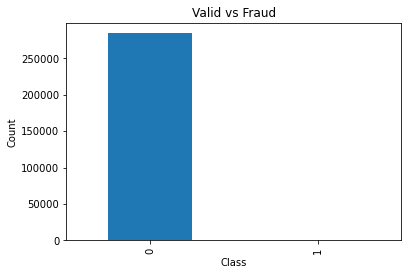

In [7]:
pd.value_counts(df['Class']).plot.bar()
plt.title('Valid vs Fraud')
plt.xlabel('Class')
plt.ylabel('Count')
df['Class'].value_counts()

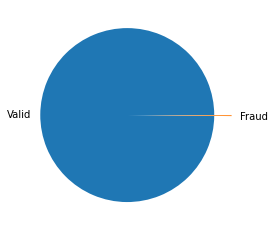

In [8]:
piegraph = np.array([PercentValid,PercentFraud])
classes = ["Valid", "Fraud"]
fraud = [0, 0.2]

plt.pie(piegraph, labels = classes, explode = fraud)
plt.show() 

From these visualizations, we observe the imbalance of the dataframe. The **problem** when applying learning algorithms on such dataset is as follows:

The algorithm receives significantly more cases from the valid class, prompting it to be biased towards that class. It does not learn what makes the other class different and fails to understand the underlying patterns that allow us to distinguish classes. Most learning algorithms would create models that recognize almost all transactions as valid. This would result in a high accuracy, since most transactions are usually valid. However, these models would not detect fraudulent transactions well, which are actually the more urgent cases to detect. Additionally, because fraud is rare, the amount of data from which to learn and identify patterns to perform an accurate classification is limited. 

![Unbalanced fish colors](https://github.com/7oelchoi/PortfolioProjects/blob/main/Creditcard_fraud/fish.PNG?raw=true)

Imagine a large group of blue fish, one of which is red. You have only one fish to learn about the common characteristics of red fish, which can be very individual since you can only examine that one fish. When other red fish are caught in the sea they might provide different characteristics and thereby derive a more informed assessment of patterns and trends. When you predict the color of the fish, regardless of the actual color and analysis of the fish, the safest prediction is that the fish will be blue. This prediction will also be correct with high probability because the chances of the fish being blue are very high.

To achieve accurate fraud detection in transactions, which is part of the strategic goal, the data must be somehow modified to a balance between the two classes.

### 4.4 Feature Scaling

Below you can see three diagrams showing the value and its density, that is, how many transactions in the dataset have this value. As you can see, the transaction amount has its most entries up to 500, but there are other amounts that exceed 2000, but with a small number of cases. The values for transaction time go well beyond 50,000. Feature V1, on the other hand, has roughly a range between -5 and 2.5. These extreme differences in the magnitude of the values are problematic for analysis because they can lead to inaccurate results.

C:\Users\joelc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joelc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joelc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

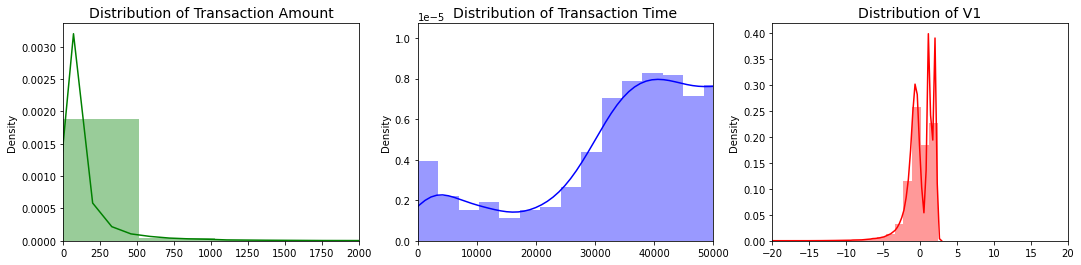

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values
v1_val = df['V1'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), 2000])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), 50000])

sns.distplot(v1_val, ax=ax[2], color='r')
ax[2].set_title('Distribution of V1', fontsize=14)
ax[2].set_xlim([-20, 20])

plt.show()

To bring all features in the same standing, we need to do **scaling** so that one significant number doesn’t impact the model just because of their large magnitude. Most ML algorithms use (Euclidean) **distance** between two data points in their computations for classification and normalizing the ranges of all features is necessary so that all features contribute proportionately to the final distance. Features with high magnitudes will weigh in significantly more in the distance calculations than lower magnitude features. We are able to surpress this effect, by scaling the features to the same level of magnitudes. Another advantage of scaled features is faster convergence on a commonly used technique called gradient descent, which means the algorithm finishes much **faster**.

![](https://github.com/7oelchoi/PortfolioProjects/blob/main/Creditcard_fraud/pics/elephant%20dog.PNG?raw=true)

Let's consider the following table of animals for clarification:

| Name        | Weight | Number     |
| :----------- | :----------- | :---------- |
| Ape        | 388 kg | 7     |
| Elephant        | 6000 kg | 3     |
| Tiger        | 260 kg | 5     |
| Hippopotamus     | 1530 kg | 2     |
| Dog    | 45 kg | 4     |

Instinctively, humans are able to recognize the significance of numbers on the basis of the features weight and number. Machines, on the other hand, cannot distinguish between them, which leads them to conclude that since all weight values are significantly higher than number, the weight characteristic must be more important than the number characteristic. This leads to a higher prioritization of the weight feature during the training of the model. 

### 4.5 Feature correlation

This figure displays the correlations between all the features in the data set in a matrix representation.
The **correlation** is a relationship or correlation between two variables where if one changes, the other is likely to change as well.

![](https://github.com/7oelchoi/PortfolioProjects/blob/main/Creditcard_fraud/pics/Correlation.PNG?raw=true)

However, it is important to note that correlation does not mean **causation**. In some cases, the change in one characteristic does not cause the change in the other. Then there is correlation, but ultimately no causality. Making this distinction is vital as cognitive bias or irrational thinking patterns often lead to assumptions of causality and ultimately incorrect and biased economic decisions. Therefore the plot should be enjoyed with a grain of salt.

So far, no significant correlation between the features is apparent. The graph shows another disadvantage of unbalanced data sets, namely the inability to detect correlations. After we have balanced the data set, it becomes clear that there are indeed correlations between features that were not previously detected.

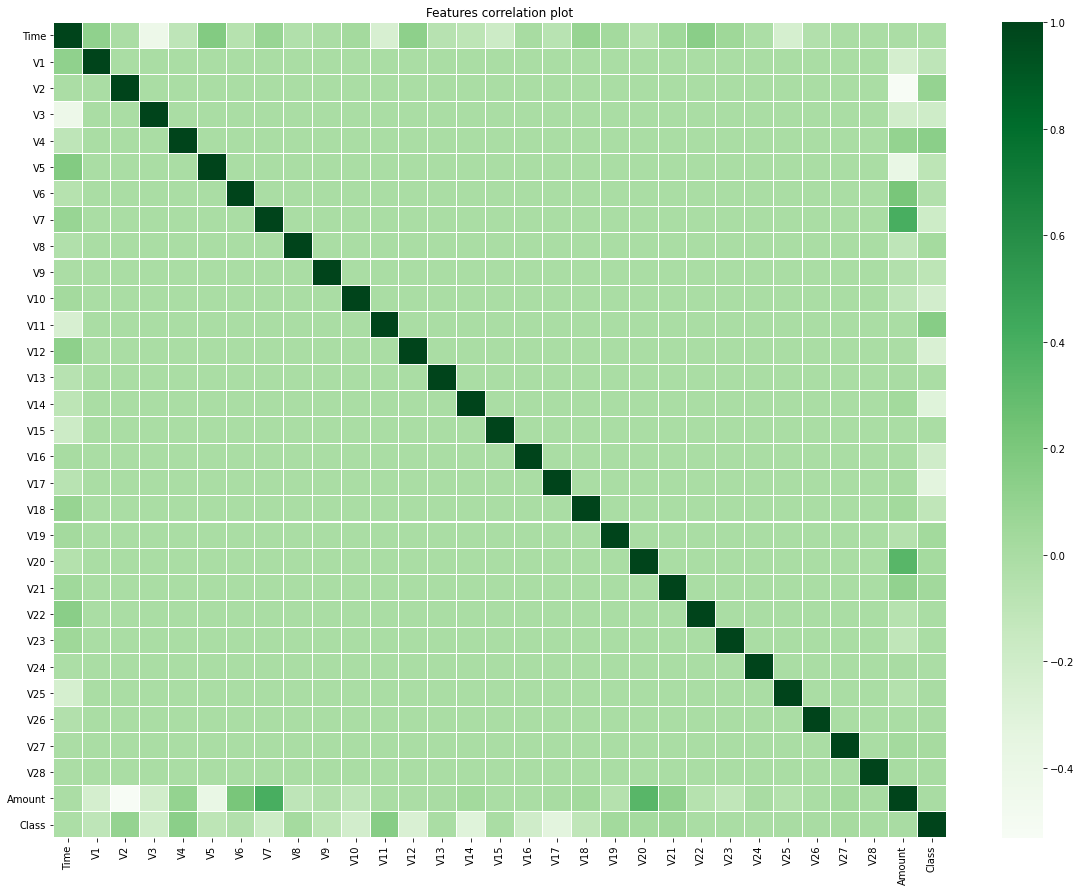

In [10]:
plt.figure(figsize = (20,15))
plt.title('Features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens", annot = False)
plt.show()

## 5. Pre-processing

In this part, the previously determined problems concerning the dataset inhibiting effective application of ML algorithms and model training, are solved by making adjustments prior to the training.
These two problems need to be addressed:

* **Scaling** the features Time and Amount
* **Balancing** the data set

### 5.1 Scaling Time and Amount

The scaling of features is fortunately not preformed manually, there are several methods available in the sklearn library. These are some ways to perform feature scaling:

* Min Max Scaler
* Standard Scaler
* Robust Scaler
* Quantile Transformer Scaler
* Unit Vector Scaler

There are many more methods for scaling, but we are going to be using the robust scaler.

**Robust Scaler**

The name comes from the fact that the scaler is robust to **outliers**. If the data contains many outliers, scaling using the mean and standard deviation of the data will not work well.

Before we proceed with the use of the scaler, it is better to understand what outliers are in order to understand the reason for this choice.

**Outliers**

The term **outlier** is widely used as an observation that appears distant and **deviates from an overall pattern** in a sample. It must be observed closely, otherwise it can lead to incorrect estimates. Some causes for these outliers is data entry errors caused by humans, measurement errors caused by faulty measurement instruments, and natural outliers not caused by errors. Let's look at the following example to understand what kind of impact these outliers have:

| Name        | Assets |
| :----------- | :----------- |
| Max Moon        | 746,820 USD |
| Rodger Rabbit        | 543,000 USD |
| Tina Tigger        | 923,000 USD |
| Bill Gates     | 139,000,000,000 USD |
| Walter White     | 1,234,300 USD |

| Statistical measurement        | With Bill Gates | Without Bill Gates |
| :----------- | :----------- | :----------- |
| Mean        | 27,800,689,424 | 861,780 |
| Median       | 923,000 | 834,910 |
| Standard Deviation       | 55,599,655,288,463 | 253,651.103 |

This is a study of the average wealth of a small sample of people. As you can see, the data with the outlier Bill Gates has a significantly different mean and standard deviation. This would lead to a complete change in the estimates. Thus, if our data set contains outliers, the robust scaler can minimize the impact of these outliers. By discovering the existence of outliers in our dataset, we can make a more informed decision.

We use the robust scaler to circumvent inaccuracies caused by such outliers in our dataset. Now we can apply the scaler to the Amount and Time features and create new columns containing the scaled values. We import the scaler and use the fit_transform function to perform the scaling. If you are using a different caustom dataset, look for characteristics that are not scaled and apply the scaling method that works best for your situation. 

In [12]:
from sklearn.preprocessing import RobustScaler

rsc = RobustScaler()
df['Amount_scaled'] = rsc.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scaled'] = rsc.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


We see that the time and magnitude features are more intact with the other features. With this change, we will be able to develop better predictive models.
The next step is to balance the dataset, by using sub-sampling techniques to approximately have the same amount of fraud and valid transactions.

### 5.2 Balancing Dataset

Without balanced data, many traditionally used models would not correctly predict fraudulent cases. Furthermore, as we have already seen, the unbalanced data set does not give us information about the correlation between the features and their influence on the classification.
There are several ways to address this classification problem, taking into account this imbalance. **Collecting more data** would be possible, but not in this case, as the new data would have a similar distribution between classes.
Another option is to resample the dataset to achieve an even distribution between classes.

We will be focusing on the following methods:

* **Random Sub-sampling (Undersampling)**: Randomly reducing size of the abundant class.
* **SMOTE (Synthetic Minority Oversampling Technique)**: Synthesize examples from the underrepresented class by selecting examples that are close to each other in the feature space, drawing a line between the examples, and drawing a new example at a point along that line.

First we will be performing random sub-sampling on the dataset to establish balance.

**Undersampling**

![Undersampling visualization](https://github.com/7oelchoi/PortfolioProjects/blob/main/Creditcard_fraud/pics/Undersampling.PNG?raw=true)

Undersampling uses all instances of the smaller class and randomly reduces the larger class to the size of the smaller class by removing entries. As mentioned earlier, it is advantageous to have a large amount of high quality data. There are 492 fraudulent cases and 284315 valid transactions according to our previous observations. This method would effectively remove 283823 valid transactions that are high quality entries. Thus, random sub-selection comes at the expense of valuable information entries and should therefore only be used if there is enough data left after the method has been executed.

Before removing the instances, we shuffle the dataset, as there may have been a predetermined order in the dataset that would result in biased removal of entries. After creating two data frames with only valid and fraudulent transactions with only 492 entries per group, we merge the two data frames and shuffle the entries again to create the final df_under data frame.

In [14]:
# Shuffling the dataframe
df = df.sample(frac=1)

# Creating dataframe exclusively with fraud or valid transactions
df_fraud = df.loc[df['Class'] == 1]
df_valid = df.loc[df['Class'] == 0][:492]

# Creating final undersampled dataframe
df_usp = pd.concat([df_fraud, df_valid])
df_under = df_usp.sample(frac=1, random_state=42)

df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 72859 to 262560
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   V1             984 non-null    float64
 1   V2             984 non-null    float64
 2   V3             984 non-null    float64
 3   V4             984 non-null    float64
 4   V5             984 non-null    float64
 5   V6             984 non-null    float64
 6   V7             984 non-null    float64
 7   V8             984 non-null    float64
 8   V9             984 non-null    float64
 9   V10            984 non-null    float64
 10  V11            984 non-null    float64
 11  V12            984 non-null    float64
 12  V13            984 non-null    float64
 13  V14            984 non-null    float64
 14  V15            984 non-null    float64
 15  V16            984 non-null    float64
 16  V17            984 non-null    float64
 17  V18            984 non-null    float64
 18  V19

0    492
1    492
Name: Class, dtype: int64

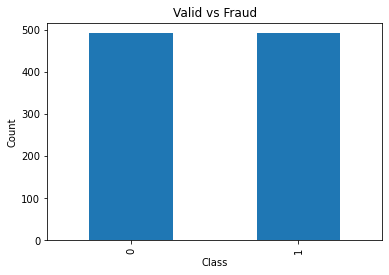

In [15]:
pd.value_counts(df_under['Class']).plot.bar()
plt.title('Valid vs Fraud')
plt.xlabel('Class')
plt.ylabel('Count')
df_under['Class'].value_counts()

Fraud:  50.0 % Valid:  50.0 %


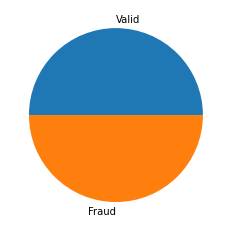

In [16]:
PerValid = round(df_under['Class'].value_counts()[0]/len(df_under) * 100,2)
PerFraud = round(df_under['Class'].value_counts()[1]/len(df_under) * 100,2)

print('Fraud: ', PerFraud, '% Valid: ', PerValid, '%')

piegraph = np.array([PerValid,PerFraud])
classes = ["Valid", "Fraud"]

plt.pie(piegraph, labels = classes)
plt.show() 

As can be seen from the pie and bar chart, the undersampled data frame contains exactly 492 valid and 492 impostor records. In later sections we will see the positive effects of this change, which include improved model training and correlation detection. If you want to balance your custom data set, you can first determine if there is actually an imbalance in the data. As a rule of thumb, a severe imbalance exists if the distribution of examples in the training dataset is very uneven, e.g. a distribution of 1:100. In this case, you can follow exactly the steps we have taken.

1. Identify the **exact number** of the underrepresented class (Weigh up whether the number is large enough)
2. **Shuffle** the dataset using the sample method
3. Create **two dataframes** for both classes with the max number of instances of the underrepresented class
4. **Concatenate** the two frames
5. **Shuffle** the dataset and **check** if the subsampling was successful (e.g., info function)

It should be noted that the 50:50 distribution of the two classes is not mandatory; a slight imbalance (e.g., 4:6) is not considered influential for model training.

**SMOTE (Synthetic Minority Oversampling Technique)**

![Oversampling Visulization](https://github.com/7oelchoi/PortfolioProjects/blob/main/Creditcard_fraud/pics/Oversampling.PNG?raw=true)

As the name implies, SMOTE is an **oversampling** technique, which is the opposite of undersampling. In random oversampling, the examples in the minority class are randomly duplicated to match the number in the majority class.

![SMOTE Visualization](https://miro.medium.com/max/1400/0*MaZhmNw4iqK4M086.png)

A possible problem with this technique however is the potential for overfitting to the minority data. **Overfitting** means that the model performs well on the data for which it was trained, but poorly on other test data. This means that the model is too closely fitted to the examples it was trained with. In our dataset, the minority class clearly outnumbers the majority class, so some entries will be duplicated more than once. Since the algorithm is confronted with duplicate entries relatively often in this case, overfitting occurs.

SMOTE also balances the data by oversampling, but instead of duplicating entries, it creates and adds **synthetic examples**. It is a type of **data augmentation** and is perhaps the most commonly used technique for synthesizing new examples. It involves selecting examples that are close to each other in feature space, drawing a line between the examples, and drawing a new example at a point along that line. The strength of this approach lies particularly in the plausibility of the examples produced, since they are relatively close in feature space to the existing examples from the minority class. A possible **downside** of the approach is that during the synthetic creation, the majority class is not considered, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

To use this function we first need to import it from the library imblearn.
After that we use SMOTE for balancing after splitting the dataset into train and test sets.

**Why split the original dataset?**

![](https://github.com/7oelchoi/PortfolioProjects/blob/main/Creditcard_fraud/pics/Datasplit.PNG?raw=true)

To build a reliable machine learning model, the splitting of the dataset into **training**, **testing**, and validation set is integral. If the dataset is used without split, the model would be trained and tested from the same dataset. Even if the model performs extremely well in this scenario, it would not vouch for the quality of the model. 

![Student training example](https://github.com/7oelchoi/PortfolioProjects/blob/main/Creditcard_fraud/pics/training.PNG?raw=true)

Think of a student who is studying for a math exam. To prepare for the exam, the teacher regularly provides practice tasks that the student solves thoroughly. However, the final test before the exam to assess the student's abilities contains only tasks that were already set during the preparation phase. The student will solve all the tasks with ease. However, when faced with other tasks in the real exam, his performance will not be as good as in the test he prepared for. 

The same is true for machine learning models. To evaluate them properly, we need to distinguish between data with which they have been trained and data with which they are tested. This way, we **avoid overfitting** and get a more accurate assessment of the model, which we can then compare to others.

* **Training Set**: The training set is used to train and make the model learn the patterns in the data.
* **Testing Set**: Set of data used to test the model after completing the training. It provides an unbiased final model performance metric.
* **Validation Set**: Used to validate model performance during training. It provides information to optimize parameters and configurations accordingly. The most important advantage is the avoidance of overfitting. Mostly used when overfitting is expected or likely. For our analysis this set is not used.

**How to split the data?**

There is no optimal distribution that applies to all data sets. One has to find a distribution percentage that meets the requirements and satisfies the needs of the model. Variance in training or evaluation is a key factor in choosing the optimal split, but we will not go into too much detail here. Usually the training portion is the largest compared to the others and the validation and testing portions are usually similar. In general a 80:20 split between training and test data is the most widespread distribution.

**Apply SMOTE on test and training set**

Before we can import the SMOTE function, it is sometimes necessary to perform the following line of code as otherwise the module imblearn will not be found. 

In [17]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\joelc\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.9 MB

The following packages will be UPDATED:

  conda                               4.10.3-py38haa244fe_4 --> 4.11.0-py38haa244fe_0




conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   | 1          |   1% 
conda-4.11.0         | 16.9 MB   | 4          |   5% 
conda-4.11.0         | 16.9 MB   | #1         |  12% 
conda-4.11.0         | 16.9 MB   | #9         |  19% 
conda-4.11.0         | 16.9 MB 

Now we can import the required functions and **split** the dataset into training and test data.
The **shape** function returns a tuple with the number of rows and the number of columns. In the output, we see the number of entries in each set, with 227,845 in the training set and 56,962 in the test set, representing 80% and 20% of the original data set. Die Menge X umfasst alle Einträge mit den beschreibenden Merkmalen, während y alle Einträge in Bezug auf ihre Klassifizierung umfasst

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state = 42)

# Divide all class feature and all others
X = np.array(df.loc[:, df.columns != 'Class'])
y = np.array(df.loc[:, df.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

from sklearn.model_selection import train_test_split

Shape of X: (284807, 30)
Shape of y: (284807, 1)
Shape of X_train:  (227845, 30)
Shape of y_train:  (227845, 1)
Shape of X_test:  (56962, 30)
Shape of y_test:  (56962, 1)


In [19]:
print("Before application of SMOTE, there are: {}".format(sum(y_train==1)), "fraudulent transactions.")
print("Before application of SMOTE, there are: {} \n".format(sum(y_train==0)),"valid transactions.")

Before application of SMOTE, there are: [398] fraudulent transactions.
Before application of SMOTE, there are: [227447] 
 valid transactions.


Note that there are only 381 fraudulent transactions as opposed to previously the 492, because we are currently looking at the training set. In the next step we will use SMOTE to increase the count of fraudulent cases.

In [38]:
# Creating oversampled dataset
X_train_over, y_train_over = sm.fit_resample(X_train, y_train.ravel())

print("After application of SMOTE, there are: {}".format(sum(y_train_over==1)), "fraudulent transactions.")
print("After application of SMOTE, there are: {} \n".format(sum(y_train_over==0)),"valid transactions.")

After application of SMOTE, there are: 227447 fraudulent transactions.
After application of SMOTE, there are: 227447 
 valid transactions.


The output shows that after applying SMOTE, the fraudulent transactions are now as numerous as the valid transactions.
If you are familiar with Python programming, you will have noticed that **only the training dataset has been extended** with SMOTE, the test dataset has not been changed. This is done intentionally, as the test data is intended to retain the distribution of real-world situations in order to evaluate the model in a realistic environment. 

To summarize, if you want to oversample the minority class using SMOTE you need to perform the following tasks:

1. Perform conda install -c conda-forge imbalanced-learn command if import of SMOTE function does not work
2. Import the SMOTE function train test split function
3. Split dataset into test and training set (e.g., 8:2)
4. Use SMOTE on training dataset
5. Check if oversampling worked correctly

**Splitting undersampled dataset**

The undersampled dataset also needs to be split so that we can evaluate both methods and make accurate comparisons. We again choose a 8:2 split and get the following split:

In [21]:
# Differenitate Data and classifier

X = df.drop('Class', axis = 1)
y = df['Class']

X_under = df_under.drop('Class', axis = 1)
y_under = df_under['Class']

# Undersampled Dataset splitting
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42)

print('Shape of X_train_under:', X_train_under.shape)
print('Shape of y_train_under:', y_train_under.shape)
print('Shape of X_test_under:', X_test_under.shape)
print('Shape of y_test_under:', y_test_under.shape)

Shape of X_train_under: (787, 30)
Shape of y_train_under: (787,)
Shape of X_test_under: (197, 30)
Shape of y_test_under: (197,)


## Correlation of Features

Before proceeding with the training of the ML models, we look at how the correlation matrix changed after the adjustment process. As mentioned earlier, the original dataset does not provide any meaningful information about the correlation between the features. However, looking at the balanced dataset, some crucial information becomes clear.

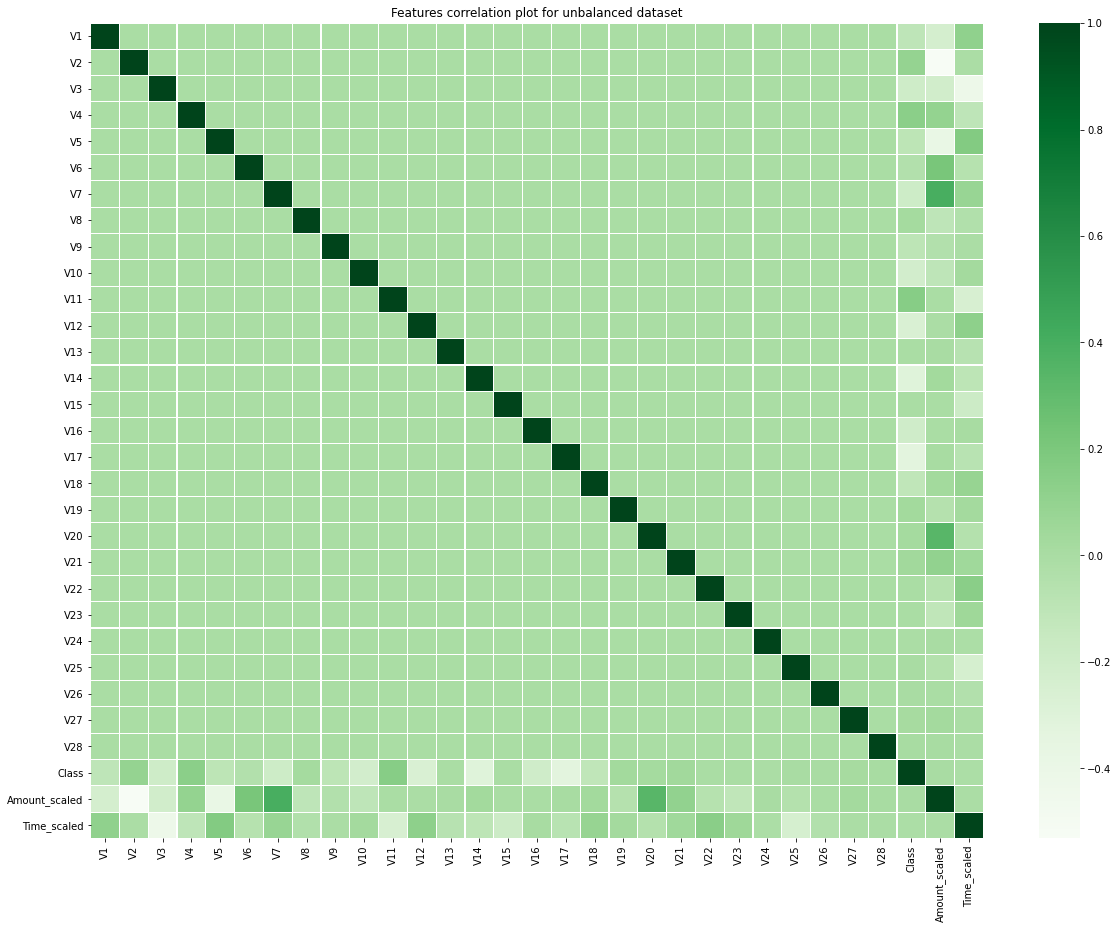

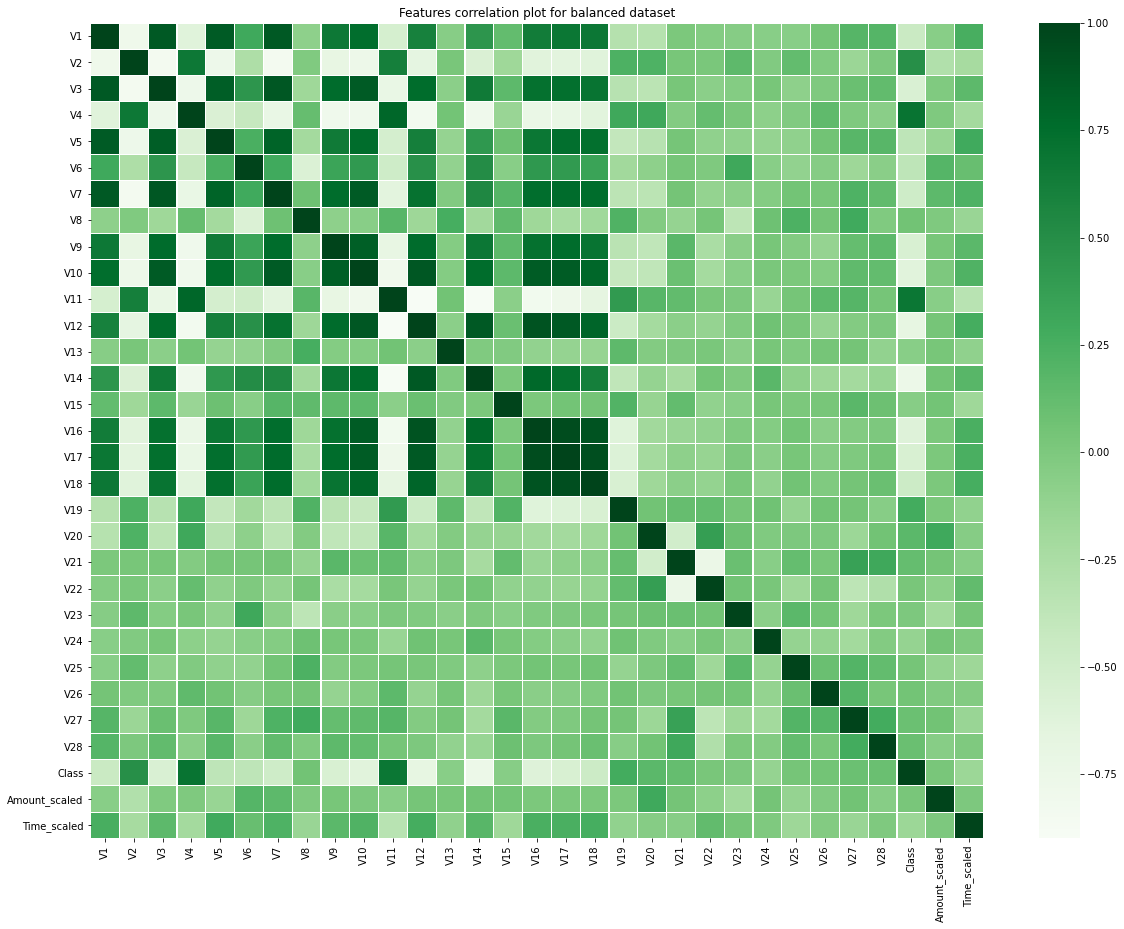

In [22]:
# Plotting correlation figures
plt.figure(figsize = (20,15))
plt.title('Features correlation plot for unbalanced dataset')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens", annot = False)
plt.show()

plt.figure(figsize = (20,15))
plt.title('Features correlation plot for balanced dataset')
corr = df_under.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens", annot = False)
plt.show()

As the matrix shows, we can observe a significant increase in information output in the correlations. Features V1-V18 show the existence of positive and negative correlations. These can be further analyzed if it is necessary to specifically understand what relationships these features have and if there is possibly a causal relationship between them. Since in our dataset these features are protected, we will not consider these correlations further.

What you should take away from this is that if detecting correlations between features is of interest to your problem, you should match the dataset before analyzing it.

This completes the preprocessing of the dataset and it can now be used to train different ML models and evaluate them against the test set.

## 6. Training of ML Models

As mentioned earlier, only supervised learning techniques are used in this work. There are countless techniques that can be applied to binary classification problems like ours. Since we cannot cover all of them in this paper, we will present some of the best known techniques. In the following, these techniques are briefly presented, but without going into details, as this is not necessary for the application. You can regard these functions as black boxes to train ML models, which will later be evaluated.

* **Logistic Regression**: Statistical model that usees a logistic function to model a binary dependent variable
* **Support Vector Classification (SVC)**: Applies support-vector machines (SVMs) for classification
* **Random Forest Classifier (RF)**: Constructs a multitude of decision trees to perform classification
* **K-Nearest Neighbors Classifier (KNN)**: Classification based on distances between data points

In the following, we perform training on our oversampled and undersampled dataset. After we fit the data for training, the models are able to make predictions for the test data. 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialise ML algorithms
lr_over = LogisticRegression()
rf_over = RandomForestClassifier()
knn_over = KNeighborsClassifier()
svc_over = SVC()

lr_under = LogisticRegression()
rf_under = RandomForestClassifier()
knn_under = KNeighborsClassifier()
svc_under = SVC()

In [24]:
# Fitting onto Undersampled dataset
lr_under.fit(X_train_under, y_train_under)
rf_under.fit(X_train_under, y_train_under)
knn_under.fit(X_train_under, y_train_under)
svc_under.fit(X_train_under, y_train_under)

SVC()

In [ ]:
# Fitting onto Oversampled dataset
lr_over.fit(X_train_over, y_train_over)
rf_over.fit(X_train_over, y_train_over)
knn_over.fit(X_train_over, y_train_over)
svc_over.fit(X_train_over, y_train_over)

In [26]:
# Training and creating predictions according to ML method:
# For Undersampled data
y_pred_lr_under = lr_under.predict(X_test_under)
y_pred_rf_under = rf_under.predict(X_test_under)
y_pred_knn_under = knn_under.predict(X_test_under)
y_pred_svc_under = svc_under.predict(X_test_under)

# For Oversampled data
y_pred_lr_over = lr_over.predict(X_test)
y_pred_rf_over = rf_over.predict(X_test)
y_pred_knn_over = knn_over.predict(X_test)
y_pred_svc_over = svc_over.predict(X_test)

Now that we have the predictions of each model for the test data, we can evaluate these predictions and compare the performance of the models. There are multiple evaluation metrics commonly used in data analytics.

## 7. Evaluation of Models

Choosing which evaluation metric to use is an important decision when it comes to finding the best model. There is no single metric that perfectly assesses all models; it depends on what type of problem it is. In this chapter some of the most used metrics will be introduced and used to evaluate the model.

### 7.1 Confusion Matrix

The confusion matrix is a 2x2 matrix used for evaluating models on a set of test data. It contains the following values:

|         | Prediction = No | Prediction = Yes |
| :----------- | :----------- | :----------- |
| Actual = No        | True Negative | False Positive |
| Actual = Yes        | False Negative | True Positive |

For our datset these values mean:
* **True negative (TN)**: Valid transaction was accurately predicted to be a valid transaction
* **False negative (FN)**: Predicted to be valid but actually was fraudulent
* **False positive (FP)**: Predicted to be fraud but actually was valid
* **True positive (TP)**: Fraudulent transaction was accurately predicted to be a fraudulent transaction

<ipython-input-27-2e7d84a66699>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
<ipython-input-27-2e7d84a66699>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


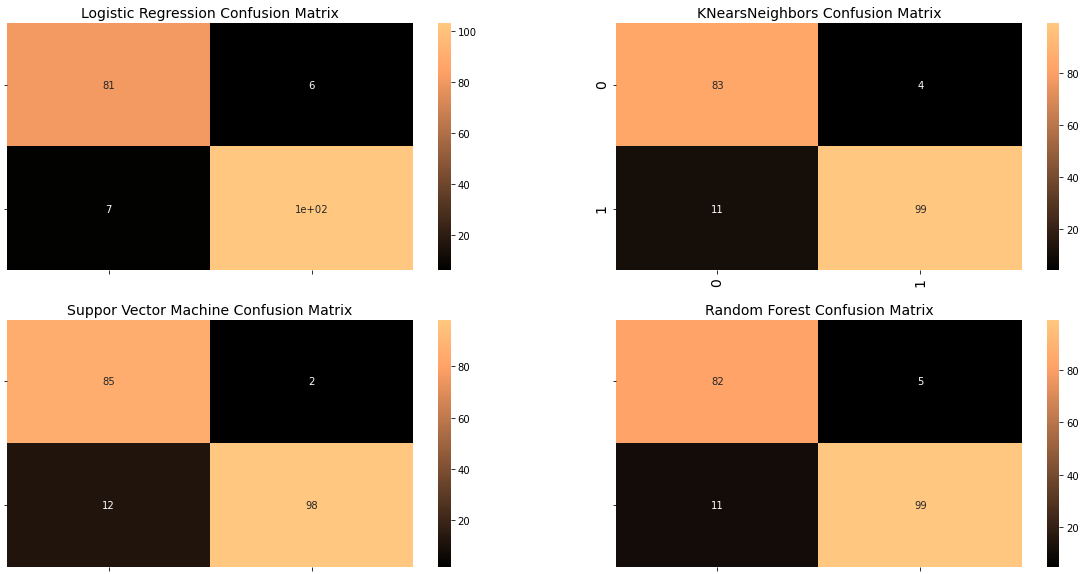

In [27]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

cf_lr_under = confusion_matrix(y_test_under, y_pred_lr_under)
cf_rf_under = confusion_matrix(y_test_under, y_pred_rf_under)
cf_knn_under = confusion_matrix(y_test_under, y_pred_knn_under)
cf_svc_under = confusion_matrix(y_test_under, y_pred_svc_under)

# Creating Confusion matrices
fig, ax = plt.subplots(2, 2,figsize=(20,10))

sns.heatmap(cf_lr_under, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_knn_under, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_svc_under, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Machine Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_rf_under, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

From the matrices we can see that the 4 models all perform similarly well. The total number of false positives and negatives range between 14 and 16 transacitons. The total amount of cases are 196 which is exacty 20% of the total transactions in the undersampled dataset.

<ipython-input-28-4e4160e11495>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
<ipython-input-28-4e4160e11495>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


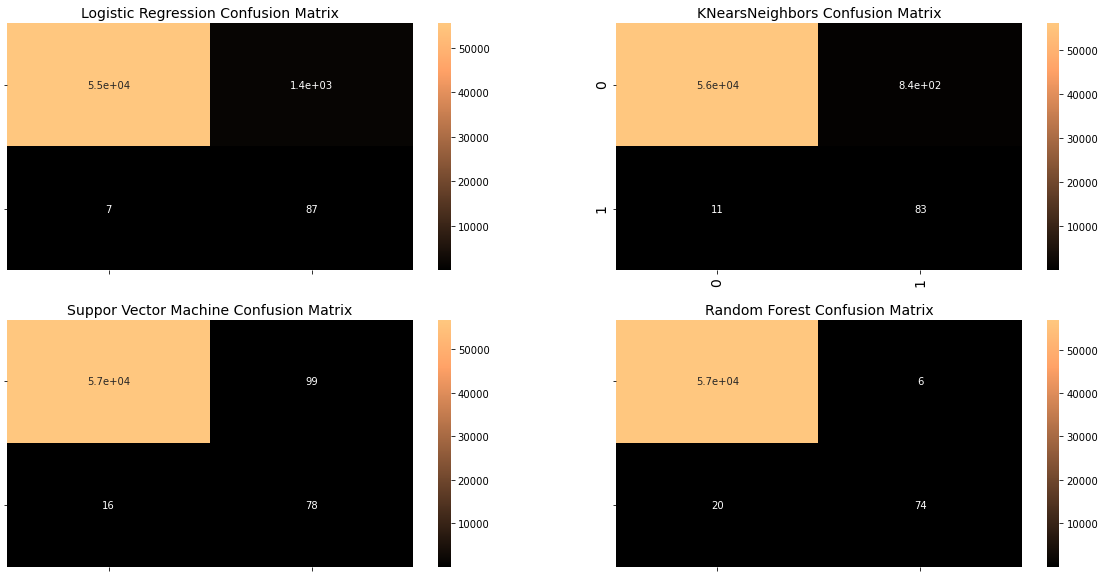

In [28]:
cf_lr_over = confusion_matrix(y_test, y_pred_lr_over)
cf_rf_over = confusion_matrix(y_test, y_pred_rf_over)
cf_knn_over = confusion_matrix(y_test, y_pred_knn_over)
cf_svc_over = confusion_matrix(y_test, y_pred_svc_over)

# Creating Confusion matrices
fig, ax = plt.subplots(2, 2,figsize=(20,10))

sns.heatmap(cf_lr_over, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_knn_over, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_svc_over, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Machine Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_rf_over, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

**Interpretation of the confusion matrices**

Here we see the confusion matrices for the undersampled data set using the four different algorithms presented earlier. This method is useful for getting a general sense of performance and can be used to further evaluate the models. Logistic regression and K-nearest neighbors produce a significant number of false positives. Again, the Random Forest and Support Vector Classification methods perform better in comparison. Compared to the **random undersampling method**, SMOTE performs significantly worse. 

From these values provided by the confusion matrix, we can extract the next set of evaluation metrics: the precision, recall, and f1 score values.

### Accuracy 

$$\frac{TP+TN}{TP+TN+FP+FN}$$ 

Informally, accuracy is the fraction of predictions the model predicted correctly. Formally, accuracy is a division of the number of correct predictions by the total number of predictions. For unbalanced data sets, this metric does not provide an accurate score for the model because the test data is highly unbalanced. The model could predict all transactions as valid and would still receive a good score using the accuracy formula. The false-negative transactions, which are the most important in this dataset, are not considered as strongly.

### Precision

$$\frac{TP}{TP+FP}$$ 

Precision indicates how accurate a model is by determining how many of the predicted positives are actually positive. Precision is a good measure to determine when the cost of false positives is high. For example, in spam detection. In spam detection, a false positive means that an email that is not spam has been identified as spam. The email user could lose important emails if the accuracy of the model is not high. This is not so important for fraud detection, since classifying a valid transaction as fraud would lead to an additional workload in the worst case. As long as the accuracy has a sufficiently high value, the model should be fine.

### Recall

$$\frac{TP}{TP+FN}$$ 

Recall calculates how many of the true positives our model captures by labeling it as positive. Using the same thought process, we can infer that recall is a model metric best used to select the best model when the cost of false negatives is high. This is exactly the case with credit card fraud detection models, as reliable detection of fraudulent transactions is the focus. We should therefore pay close attention to the performance of the models in terms of recall value.

### F1 Score

$$2*\frac{Precision * Recall}{Precision+Recall}$$

The F1 score examines the balance between the precision and recall values. When considering the difference from the precision measure, the F1 score takes into account both false positives and false negatives, whereas the precision measure does not. Thus, the F1 valuation is more appropriate for our problem and also in general, since false positives and negatives are the highest cost in most business cases.

In [29]:
print('Evaluation of undersampled data')
print('Evaluation for Logistic Regression')
print('Accuracy:', round(metrics.accuracy_score(y_test_under, y_pred_lr_under)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test_under, y_pred_lr_under)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test_under, y_pred_lr_under)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test_under, y_pred_lr_under, average='macro')*100, 2), '%')

print('Evaluation for Random Forest Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test_under, y_pred_rf_under)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test_under, y_pred_rf_under)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test_under, y_pred_rf_under)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test_under, y_pred_rf_under, average='macro')*100, 2), '%')

print('Evaluation for KNearsNeighbors Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test_under, y_pred_knn_under)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test_under, y_pred_knn_under)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test_under, y_pred_knn_under)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test_under, y_pred_knn_under, average='macro')*100, 2), '%')

print('Evaluation for Support Vector Machine Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test_under, y_pred_svc_under)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test_under, y_pred_svc_under)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test_under, y_pred_svc_under)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test_under, y_pred_svc_under, average='macro')*100, 2), '%')

Evaluation of undersampled data
Evaluation for Logistic Regression
Accuracy: 93.4 %
Precision: 94.5 %
Recall: 93.64 %
F1-Score: 93.32 %
Evaluation for Random Forest Classification
Accuracy: 91.88 %
Precision: 95.19 %
Recall: 90.0 %
F1-Score: 91.82 %
Evaluation for KNearsNeighbors Classification
Accuracy: 92.89 %
Precision: 98.0 %
Recall: 89.09 %
F1-Score: 92.86 %
Evaluation for Support Vector Machine Classification
Accuracy: 92.39 %
Precision: 96.12 %
Recall: 90.0 %
F1-Score: 92.34 %


In [30]:
print('Evaluation of oversampled data')
print('Evaluation for Logistic Regression')
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred_lr_over)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test, y_pred_lr_over)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test, y_pred_lr_over)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test, y_pred_lr_over, average='macro')*100, 2), '%')

print('Evaluation for Random Forest Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred_rf_over)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test, y_pred_rf_over)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test, y_pred_rf_over)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test, y_pred_rf_over, average='macro')*100, 2), '%')

print('Evaluation for KNearsNeighbors Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred_knn_over)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test, y_pred_knn_over)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test, y_pred_knn_over)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test, y_pred_knn_over, average='macro')*100, 2), '%')

print('Evaluation for Support Vector Machine Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred_svc_over)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test, y_pred_svc_over)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test, y_pred_svc_over)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test, y_pred_svc_over, average='macro')*100, 2), '%')

Evaluation of oversampled data
Evaluation for Logistic Regression
Accuracy: 97.52 %
Precision: 5.84 %
Recall: 92.55 %
F1-Score: 54.86 %
Evaluation for Random Forest Classification
Accuracy: 99.95 %
Precision: 92.5 %
Recall: 78.72 %
F1-Score: 92.52 %
Evaluation for KNearsNeighbors Classification
Accuracy: 99.8 %
Precision: 44.07 %
Recall: 82.98 %
F1-Score: 78.73 %
Evaluation for Support Vector Machine Classification
Accuracy: 98.51 %
Precision: 9.01 %
Recall: 88.3 %
F1-Score: 57.8 %


**Interpretation of these values**

When considering these percentages, the recall metric is considered as the most important metric.

For the undersampled data set, the performances of all models are similar. However, the SVC model has a slightly lower recall value compared to the others.

The models trained on the augmented dataset is not able to perform as well as the undersampled dataset. Except for the logistic regression none of the other models are able to produce a recall score greater than 90%.

**Why is the performance of SMOTE worse**

When generating synthetic examples, SMOTE does not take into account that neighboring examples may be from other classes. This can increase the overlap of classes and cause **additional noise**. In addition, the difference between the number of instances in the two classes is significant, resulting in the synthetic generation being more than five times larger than the original class sample. The presence of noise could therefore be even more pronounced. Some of the literature recommends first subsampling the dataset and then applying the oversampling technique. Still we did manage to get good results in terms of Recall with the logistic regression model, in fact it had the highest score out of all models.

### 7.2 Receiver Operating Characteristic Curve (ROC)/ Area under the ROC Curve (AUC)

The ROC curve is a graph showing the performance of a classification model at all classification thresholds. The ROC curve is a probability curve, and AUC represents the degree of separability. The AUC is the area under the ROC curve and gives us a concrete value to measure the curve. It indicates the extent to which the model is able to differntiate between classes. Higher AUC values mean that the model's prediction is more accurate. More specifically, it is better able to provide true-positive and true-negative results.

This curve plots two parameters:

* True Positive Rate = Recall, on the x-axis

* False Positive Rate, on the y-axis

$$\frac{FP}{TN+FP}$$ 

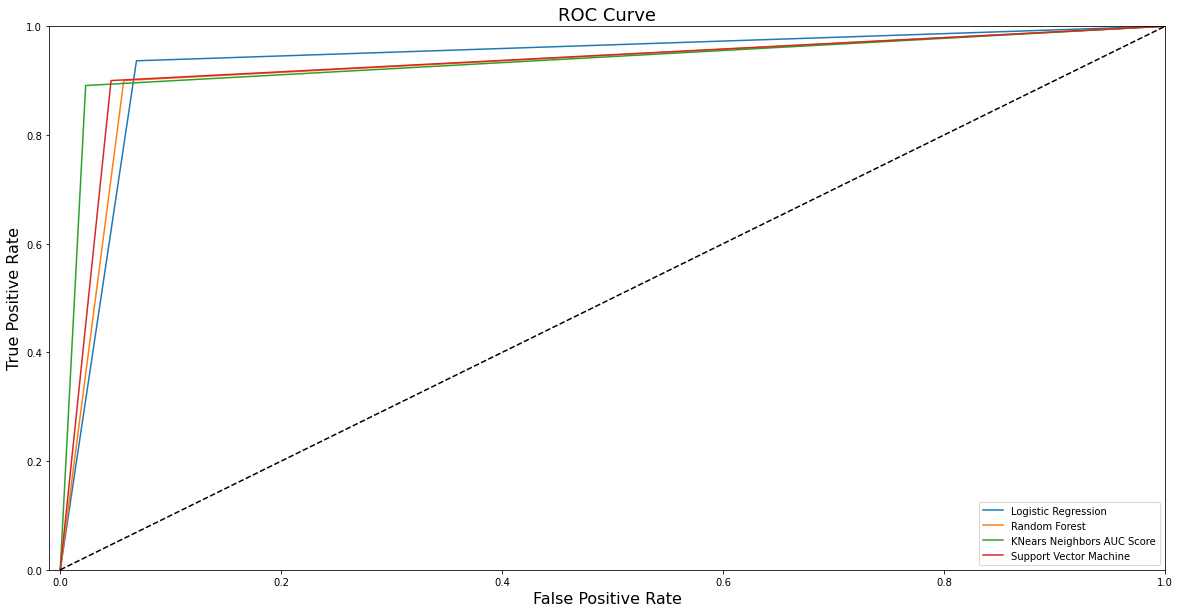

In [31]:
# ROC Curve plotting of models trained on undersampled dataset

logreg_fpr, logreg_tpr, logreg_thresold = roc_curve(y_test_under, y_pred_lr_under)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test_under, y_pred_rf_under)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test_under, y_pred_knn_under)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test_under, y_pred_svc_under)

plt.figure(figsize=(20,10))
plt.title('ROC Curve', fontsize=18)

plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors AUC Score')
plt.plot(svc_fpr, svc_tpr, label='Support Vector Machine')

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
         
plt.show()

In [32]:
# AUC score for the undersampled dataset
print('The AUC score for Logistic Regression on Undersampled Dataset is:', round(roc_auc_score(y_test_under, y_pred_lr_under)*100, 2), '%')
print('The AUC score for Random Forest on Undersampled Dataset is:',  round(roc_auc_score(y_test_under, y_pred_rf_under)*100, 2), '%')
print('The AUC score for KNears Neighbors Classifcation on Undersampled Dataset is:', round(roc_auc_score(y_test_under, y_pred_knn_under)*100, 2), '%')
print('The AUC score for Support Vector Machines on Undersampled Dataset is:',  round(roc_auc_score(y_test_under, y_pred_svc_under)*100, 2), '%')

The AUC score for Logistic Regression on Undersampled Dataset is: 93.37 %
The AUC score for Random Forest on Undersampled Dataset is: 92.13 %
The AUC score for KNears Neighbors Classifcation on Undersampled Dataset is: 93.4 %
The AUC score for Support Vector Machines on Undersampled Dataset is: 92.7 %


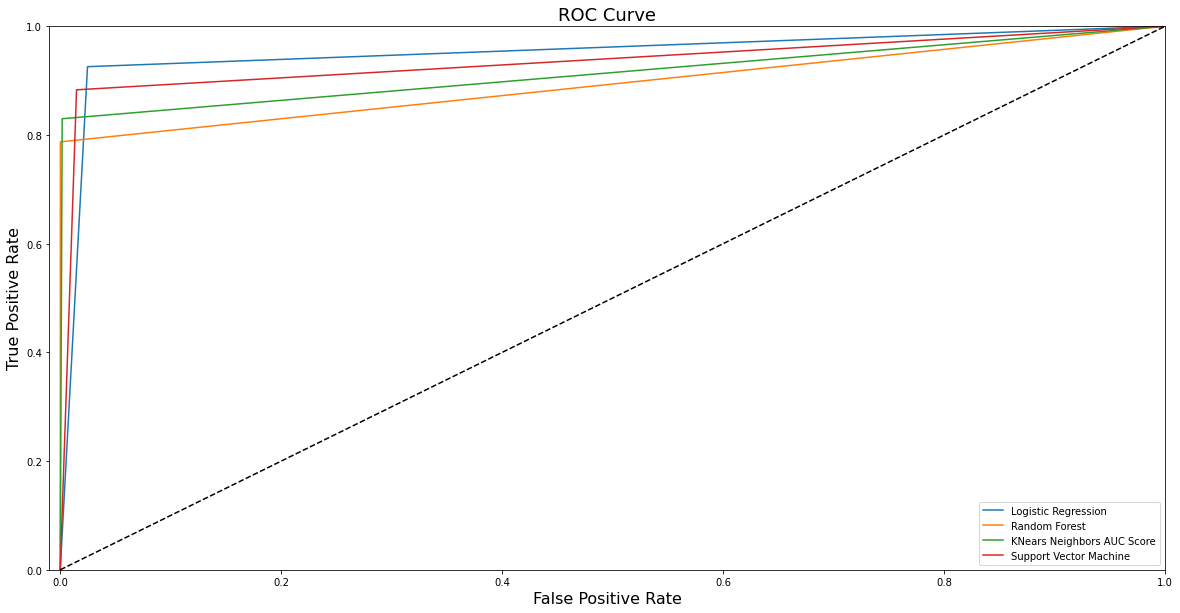

In [33]:
# ROC curve plotting of the models trained on the oversampled dataset

logreg_fpr_over, logreg_tpr_over, logreg_thresold_over = roc_curve(y_test, y_pred_lr_over)
rf_fpr_over, rf_tpr_over, rf_threshold_over = roc_curve(y_test, y_pred_rf_over)
knn_fpr_over, knn_tpr_over, knn_threshold_over = roc_curve(y_test, y_pred_knn_over)
svc_fpr_over, svc_tpr_over, svc_threshold_over = roc_curve(y_test, y_pred_svc_over)

plt.figure(figsize=(20,10))
plt.title('ROC Curve', fontsize=18)

plt.plot(logreg_fpr_over, logreg_tpr_over, label='Logistic Regression')
plt.plot(rf_fpr_over, rf_tpr_over, label='Random Forest')
plt.plot(knn_fpr_over, knn_tpr_over, label='KNears Neighbors AUC Score')
plt.plot(svc_fpr_over, svc_tpr_over, label='Support Vector Machine')

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
         
plt.show()

In [34]:
# AUC score for the undersampled dataset
print('The AUC score for Logistic Regression on Oversampled Dataset is:', round(roc_auc_score(y_test, y_pred_lr_over)*100, 2), '%')
print('The AUC score for Random Forest on Oversampled Dataset is:',  round(roc_auc_score(y_test, y_pred_rf_over)*100, 2), '%')
print('The AUC score for KNears Neighbors Classifcation on Oversampled Dataset is:', round(roc_auc_score(y_test, y_pred_knn_over)*100, 2), '%')
print('The AUC score for Support Vector Machines on Oversampled Dataset is:',  round(roc_auc_score(y_test, y_pred_svc_over)*100, 2), '%')

The AUC score for Logistic Regression on Oversampled Dataset is: 95.04 %
The AUC score for Random Forest on Oversampled Dataset is: 89.36 %
The AUC score for KNears Neighbors Classifcation on Oversampled Dataset is: 91.4 %
The AUC score for Support Vector Machines on Oversampled Dataset is: 93.41 %


**Evaluation of ROC curves and AUC scores**
All ROC curves in both the undersampled and oversampled data sets provide decent curves that are well above the mid-50% line. In the undersampled data set, all models appear to be at a similar level as suggested by the AUC values. At most, the difference in scores is less than one percent.
However, in the oversampled data set, the difference between the models is somewhat larger. Of all the models tested, the logistic regression has the best AUC score at 95.41%, while the random forest model has the poorest performance.

These are some of the most important metrics to judge a machine learning model:

* Confusion matrix
* Accuracy/Precision/Recall/F1 Score
* ROC Curve/AUC
* Cross Validation

## 8. Interpretation of Results & Future works

Now that we have completed all steps of applying data analytics and machine learning techniques to create predictive ML models, we should be able to choose a model that performs best for our dataset at hand at identifying credit card transactions as either valid or fraudulent.

Since the logistic regression model trained on the oversampling dataset has the highest recall and AUC score, one would be inclined to use this model for further predictions based on the historical data provided. Though, since the accuracy is abysmal, this would lead to many false positives, which means that the amount of work needed to verify these transactions that are classified as fraudulent is very high. Therefore, choosing one of the models trained on the lower sample dataset is a better choice, as they are almost all above 90% in every evaluation metric.

This does not mean that these models will work well with other datasets of similar format. As mentioned earlier, there is no single model that is suitable for all tasks. For each task, multiple models should be trained, evaluated against relevant metrics, and compared to the others to determine the best fit.

In addition, there is also a technique called **ensemble learning** where we use multiple learning algorithms to achieve better predictive performance than could be achieved with any of the individual learning algorithms alone.

Another widely used statistical method to assess the quality of models is **k-fold cross-validation**. It is a resampling procedure used to evaluate machine learning model. It uses a parameter k that refers to the number of groups into which a given data sample is to be divided. This method is popular because it is simple to understand and because it generally results in a less biased or less optimistic estimate of model fitness than other methods, such as a simple train/test split.

In the future also use unsupervised learning methods such as k-means clustering, because supervised learning especially on data sets as large as this one requires a lot of workload, which unsupervised learning methods can bypass as they do not require any supervision.

## 9. Summary

In this work, we performed an analysis of a credit card transaction dataset with the **enterprise goal** of using historical data to build models that automatically detect and **predict** fraudulent credit card transactions in order to reduce manual labor costs and increase customer satisfaction.

First, we **examined the data** and looked for potential issues that could negatively impact our analysis. In the next phase, these problems were eliminated through **preprocessing steps**, such as equalization and scaling. **Models were** trained on a balanced, partitioned dataset using various supervised learning algorithms. The **models were then evaluated** using various evaluation metrics, taking into account the importance of each metric to the problem at hand.

The core challenges of this data analytics process were:

* Finding the best method to balance the highly imbalanced dataset
* Determining the most fitting evaluation metric for the problem
* Evaluate models and identify the best performing model in line with our business objectives